In [23]:
import pandas as pd
import numpy as np
import datasets

aspects = [ 'actionability', 'grounding_specificity','verifiability', 'helpfulness']

data = datasets.load_dataset("boda/review_evaluation_human_annotation", name='combined_main_aspects', split = 'full').to_pandas()



In [31]:
filtered_data = {}

for x in aspects:
    for y in aspects:
        x_df = data[(data[f'{x}_label_type'] != "hard") & (data[f'{y}_label_type'] != "hard")]

        x_df = x_df[[f'{x}_label', f'{y}_label']]
        x_df = x_df.rename(columns={f'{x}_label': x, f'{y}_label': y})
        filtered_data[(x, y)] = x_df[[f'{x}', f'{y}']]


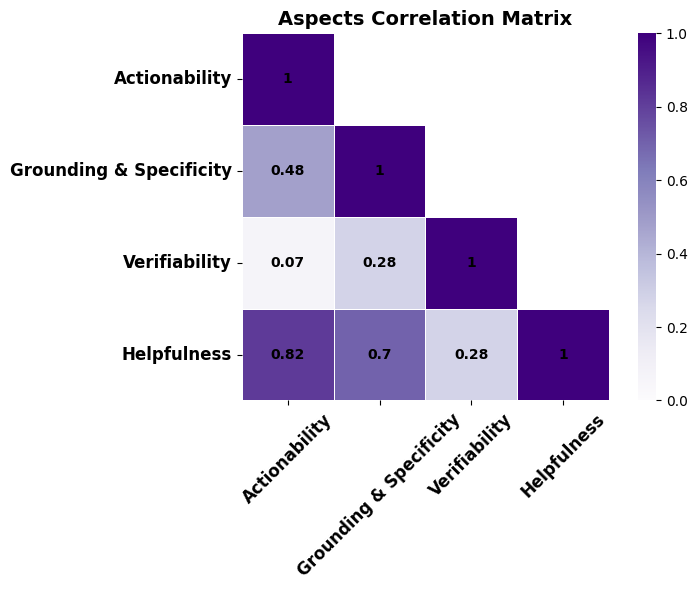

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a dictionary to store correlations
correlation_values = {}

# Calculate the correlation for each pair in filtered_data
for key, value in filtered_data.items():
    # Check if the columns are numeric
    if 'verifiability' in value.columns:
        value['verifiability'] = value['verifiability'].replace('X', 0).astype(int)
    correlation = value.corr(method='pearson').iloc[0, 1]  # Extract the correlation value
    correlation_values[key] = correlation

# labels = ['Actionability', 'Grounding & Specificity', 'Verifiability', 'Helpfulness']
# matrix = pd.DataFrame(index=labels, columns=labels)

# # Fill the matrix
# for (row, col), val in correlation_values.items():
#     matrix.loc[row, col] = val

# # Convert to float and fill upper triangle with NaNs
# matrix = matrix.astype(float)
# mask = np.triu(np.ones_like(matrix, dtype=bool))

# # Plot
# plt.figure(figsize=(8, 6))
# sns.heatmap(matrix, mask=mask, annot=True, cmap='Purples', vmin=0, vmax=1,
#             square=True, linewidths=0.5, cbar=True)

# plt.xticks(rotation=0)  # X-axis labels horizontal
# plt.title('Lower Triangular Correlation Matrix')
# plt.tight_layout()
# plt.show()

# Define labels in custom order if desired
labels = ['actionability', 'grounding_specificity', 'verifiability', 'helpfulness']
disp = ['Actionability', 'Grounding & Specificity', 'Verifiability', 'Helpfulness']

# Initialize the full matrix
matrix = pd.DataFrame(index=labels, columns=labels, dtype=float)

# Fill the matrix
for (row, col), val in correlation_values.items():
    matrix.loc[row, col] = round(val, 2)

# Convert to float and fill upper triangle with NaNs
matrix = matrix.astype(float)
mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, mask=mask, annot=True, cmap='Purples', vmin=0, vmax=1,
            square=True, linewidths=0.5, cbar=True, xticklabels=disp, yticklabels=disp,
            annot_kws={"color": "black", "fontweight": "bold"})

plt.xticks(rotation=45, fontsize=12, color='black', fontweight='bold')  # X-axis labels rotated 45 degrees
plt.yticks(fontsize=12, color='black', fontweight='bold')  # Y-axis labels
plt.title('Aspects Correlation Matrix', fontsize=14, color='black', fontweight='bold')  # Title
plt.tight_layout()
plt.savefig("outputs/aspects_correlation_matrix.pdf", format="pdf")
plt.show()

In [35]:
correlation_values

{('actionability', 'actionability'): 1.0,
 ('actionability', 'grounding_specificity'): 0.4804058809706778,
 ('actionability', 'verifiability'): 0.0651591073078131,
 ('actionability', 'helpfulness'): 0.8204518283760835,
 ('grounding_specificity', 'actionability'): 0.48040588097067777,
 ('grounding_specificity', 'grounding_specificity'): 1.0,
 ('grounding_specificity', 'verifiability'): 0.28413947231792525,
 ('grounding_specificity', 'helpfulness'): 0.7015415333144924,
 ('verifiability', 'actionability'): 0.06515910730781309,
 ('verifiability', 'grounding_specificity'): 0.2841394723179252,
 ('verifiability', 'verifiability'): 1.0,
 ('verifiability', 'helpfulness'): 0.28045770138311277,
 ('helpfulness', 'actionability'): 0.8204518283760837,
 ('helpfulness', 'grounding_specificity'): 0.7015415333144924,
 ('helpfulness', 'verifiability'): 0.2804577013831128,
 ('helpfulness', 'helpfulness'): 1.0}

In [7]:

accepted_annotators =  {
    'boda' : "boda",
    '6740484e188a64793529ee77' : "Annotator1",
    '6686ebe474531e4a1975636f': "Annotator2"
 }
aspects_data = {

    "boda" : {},
    'Annotator1' : {},
    'Annotator2' : {}
}

for a in aspects_data:
    for aspect in aspects:
        aspects_data[a][aspect] = []

for row in data:
    for aspect in aspects:
        for annotator, score in zip(row[aspect]['annotators'], row[aspect]['labels']):
            aspects_data[accepted_annotators[annotator]][aspect].append(score)
    

Correlation matrix for boda:


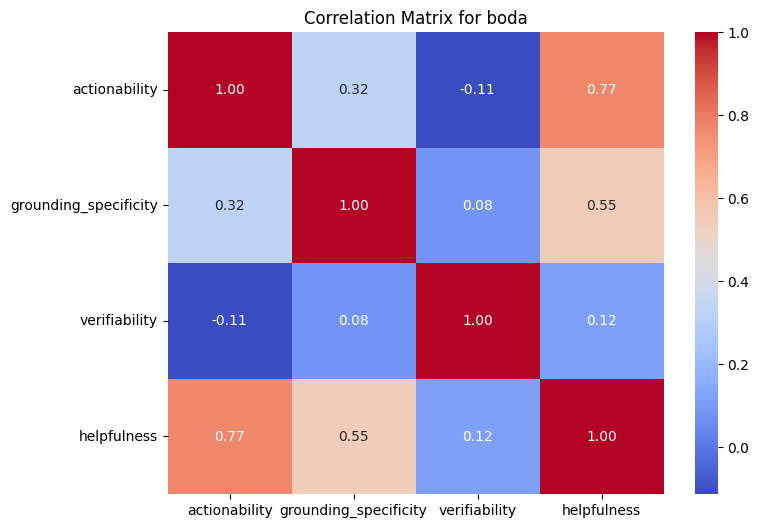

Correlation matrix for Annotator1:


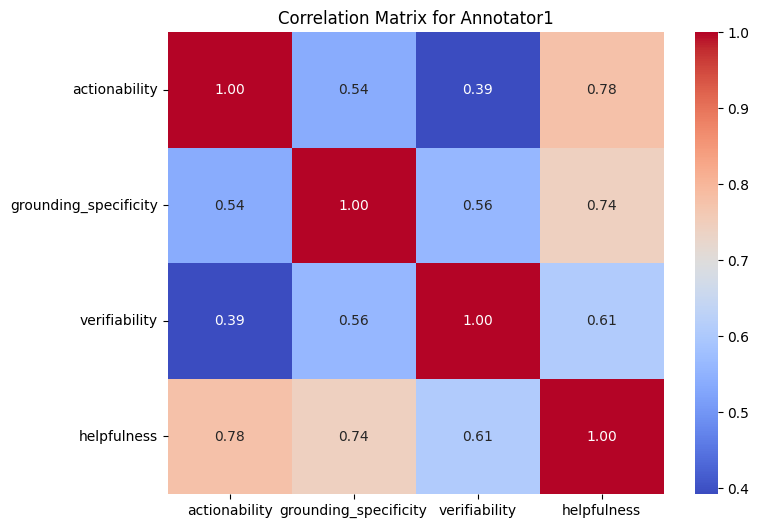

Correlation matrix for Annotator2:


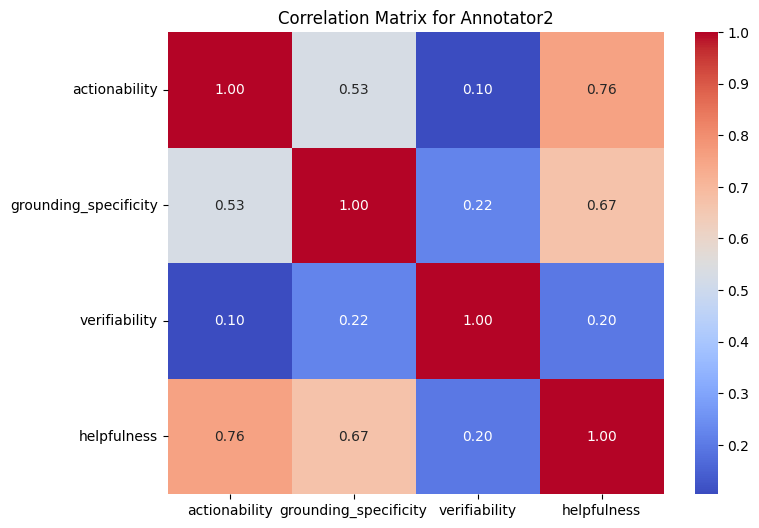

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Iterate through each annotator
for annotator_name, aspect_scores in aspects_data.items():
    print(f"Correlation matrix for {annotator_name}:")
    
    # Create a DataFrame for the annotator's scores
    df = pd.DataFrame(aspect_scores)
    
    # Replace 'X' with 0 in the 'verifiability' column
    df['verifiability'] = df['verifiability'].replace('X', 0).astype(int)
    
    # Compute the correlation matrix
    correlation_matrix = df.corr(method="pearson")
    
    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {annotator_name}")
    plt.show()